
<h1 style="text-align:center"> About the dataset </h1>

This <a href="https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset">dataset</a> is available on kaggle, and it consist of a variaety of body part meassuremes, body weight, height, age and Body Fat (BF) percentage estimate using the underwater weighting technique to obtain Body Density (BD), which is related to BF percentage using the equation:

$$
BF\% = \dfrac{495}{BD} - 450
$$


The goal is to make a model to predict the BF percentage of a male using mainly body meassurements which can be done with a simple body meassurment tape, instead of costly methods like the DEXA scan.

<h1 style="text-align:center">Data and Regression Models</h1>

Import all the libraries and methods needed to preprocess, model, and test the data.

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Load the data with the pandas library.

In [2]:
data = pd.read_csv("bodyfat.csv")

<h3>EDA and Data Preprocessing</h3>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [2]:
2+2

4

In [1]:
#cute print
print("this is a cute print")

this is a cute print


In [4]:
data.nunique()

Density    218
BodyFat    176
Age         51
Weight     197
Height      48
Neck        90
Chest      174
Abdomen    185
Hip        152
Thigh      139
Knee        90
Ankle       61
Biceps     104
Forearm     77
Wrist       44
dtype: int64

Now, let's explore the data and preprocess it.

In [5]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [6]:
data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


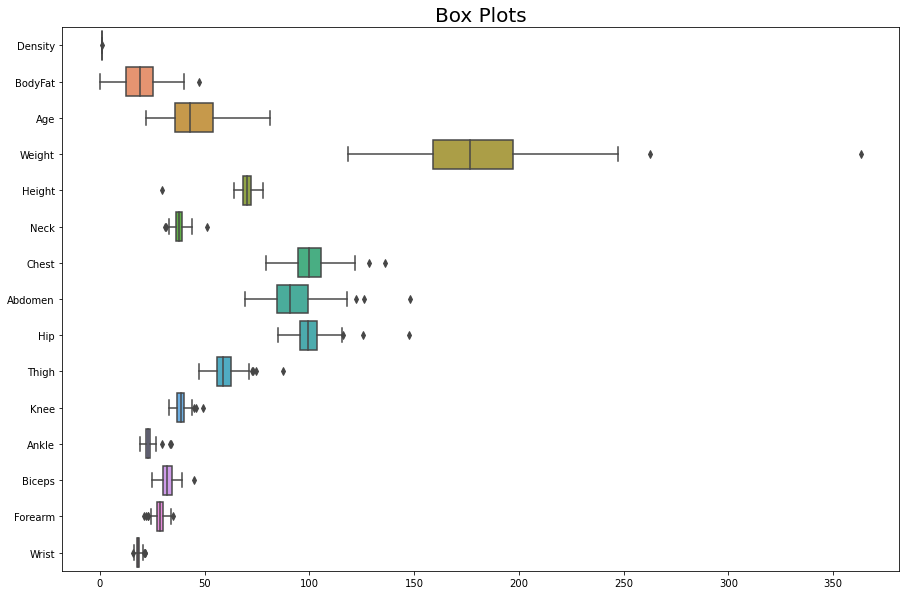

In [3]:
f, ax = plt.subplots(1,1, figsize = (15,10))
ax = sns.boxplot(data = data, orient="h")
ax.set_title("Box Plots", fontsize=20)
plt.show()

In [8]:
data[data["BodyFat"] < 3]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
171,1.0983,0.7,35,125.75,65.5,34.0,90.8,75.0,89.2,50.0,34.8,22.0,24.8,25.9,16.9
181,1.1089,0.0,40,118.50,68.0,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


For a functional body, the least ammount of body fat percentage needed is 2% (men) and 4% to be considered healthy in active men<a href="https://www.researchgate.net/publication/15195793_Lower_limit_of_body_fat_in_healthy_active_men"> [1]</a>, therefore, values under the previous threshold are not possible. 

Fun fact: Ronnie Coleman, former Mr. Olympia <a href="https://www.youtube.com/shorts/-gycp4UoOd4"> claimed</a> he was 0.33% body fat on a podcast, he has also said to have negative body fat. 

In [4]:
#Dropping rows with BF% values under 2%
data.drop([171,181], inplace = True)

In [10]:
data[data["BodyFat"] > 35]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
35,1.0101,40.1,49,191.75,65.00,38.4,118.5,113.1,113.8,61.9,38.3,21.9,32.0,29.8,17.0
38,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
191,1.0140,38.1,42,244.25,76.00,41.8,115.2,113.7,112.4,68.5,45.0,25.5,37.1,31.2,19.9
215,0.9950,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


Record 38 seems like a rare case and 215 is a case of extreme obesity, far from the average person, so  I decided to drop these two rows. 

In [5]:
#Dropping outliers above
data.drop([38,215], inplace = True)

Variable distribution and correlation between BF and body meassurments

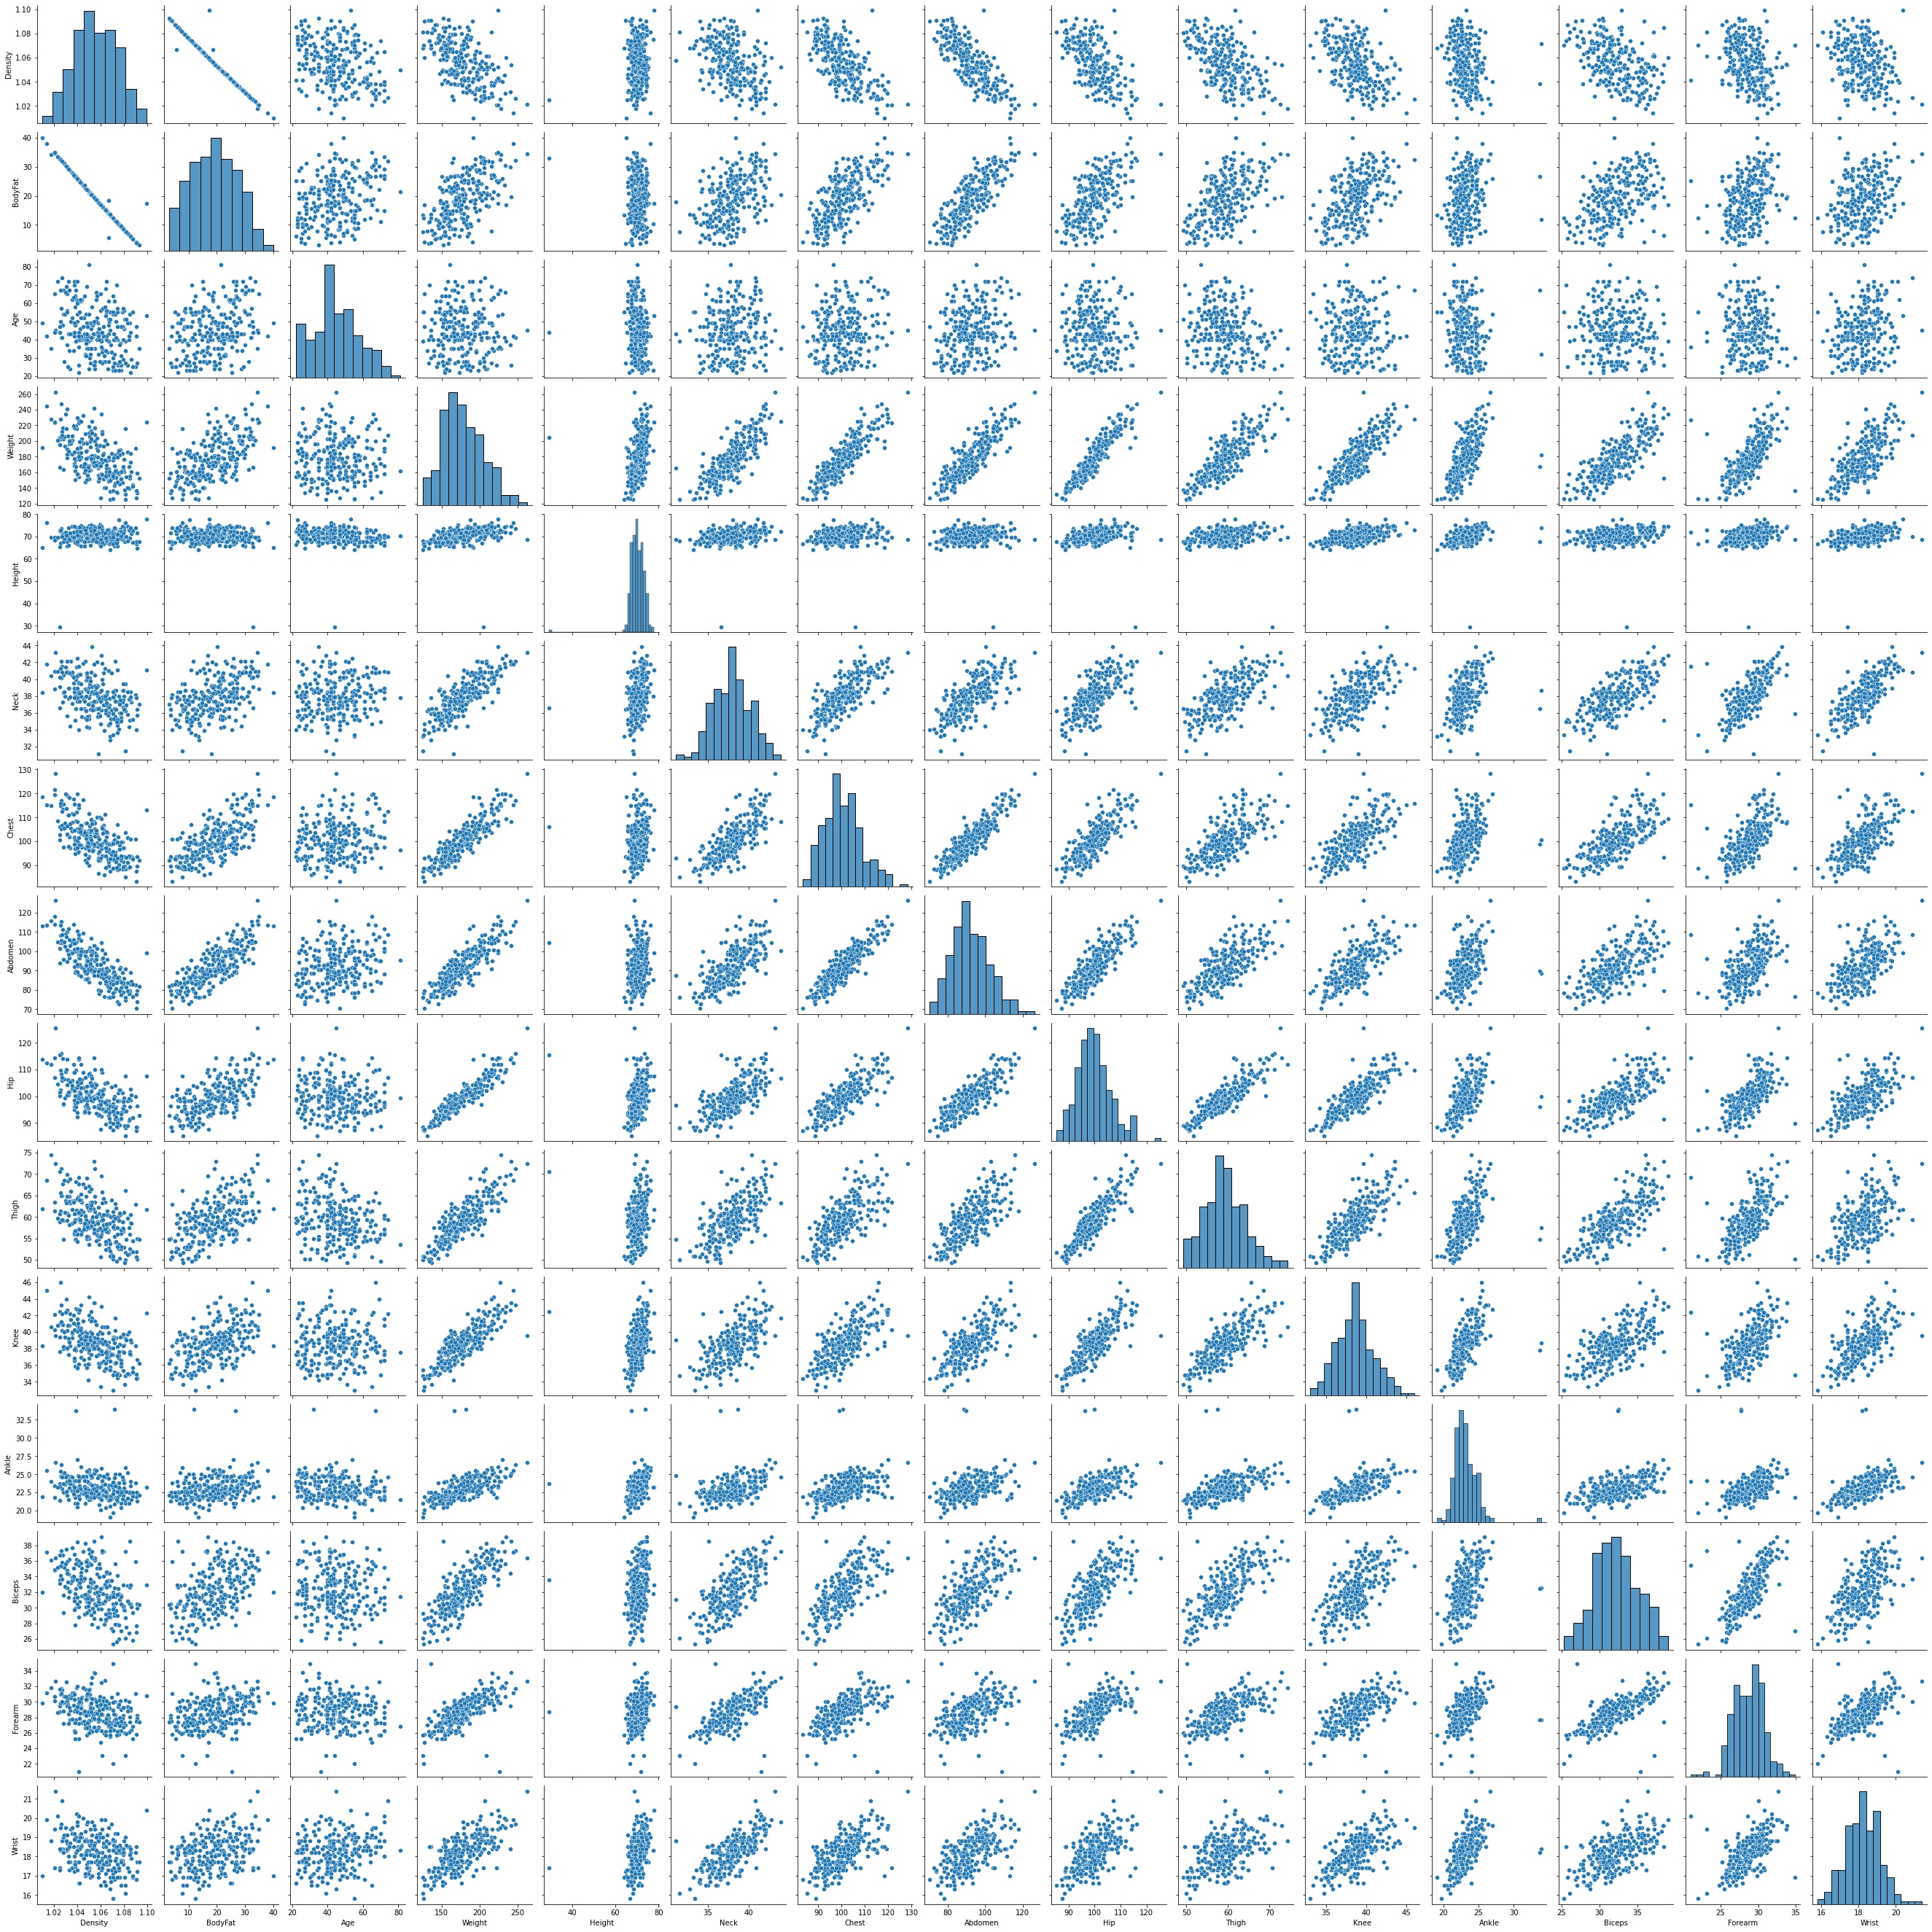

In [110]:
# plt.figure(figsize = (12,6))
ax = sns.pairplot(data)
plt.show()

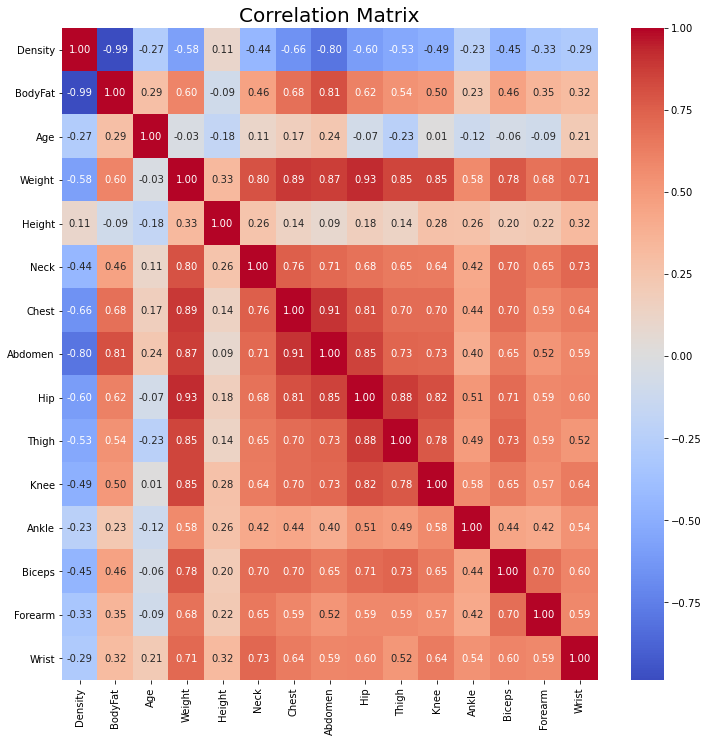

In [13]:
f, ax = plt.subplots(figsize= [12,12])

sns.heatmap(data.corr(), 
            annot=True,
            fmt=".2f",
            ax=ax,
            cmap = "coolwarm" )

ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

There is a strong positive correlation between BF% and abdomen size. This makes sense, a great amount of fat will be storage in the abdomen area, most commonly known as belly fat, unless you got "great" genetics.  

The Bone Density column won't be used in the modeling, since our target variable is BF percentage and the features are body meassurents. Let's drop the Density column and create the training and validation data for our model.

In [6]:
#Removing the target variable from the dataset and also density
y_bf = data.BodyFat
ft_model_data_DF = data.drop(["BodyFat", "Density"], axis = 1).copy()

#Scaling data
scaler = StandardScaler()
ft_model_data = scaler.fit_transform(ft_model_data_DF)

#80% training data, 20% left for validation of the models
X_train, X_valid, y_train, y_valid = train_test_split(ft_model_data_DF,
                                                      y_bf,
                                                      train_size=0.8,
                                                      test_size=0.2,
                                                      random_state=0)

<h3>ML Modeling</h3>

The functions below will be used to find the best parameters of a model using GridSearch and also asses the model performance evaluating its Mean Squared Error (MSE) and Coefficient of Determination $R^{2}$. Additionally, a line plot was attached to spot the BF% ranges where the model has adequate predictions or the opposite.

In [7]:
def model_tunning_parameters(model, params):
    '''
    It finds the best combination of parameters of the params argument for a given model, implementing GridSearch.
    
    Arguments
    model: ML instance to improve.
    
    params: Dictionary of valid parameters and values. Parameters' names are the dictionary keys and its
    values correspond to a list of possible parameter's values to assess. e.g {'n_clusters' = [4, 5, 6]}
    
    Returns a dictionary with the best set of parameters.
    '''
    Tuned = GridSearchCV(model, params, cv = 4).fit(X_train, y_train)
    print('Best Parameters:', Tuned.best_params_, '\n')
    return Tuned.best_params_

In [11]:
def model_performance(model, name):
    '''
    Compute the Mean Squared Error (MSE) and Coefficient of Determination of the given model and plots a line graph of 
    real values againts the model's predicted values model.
    
    Arguments
    model: ML instance to evaluate.
    
    name: Name of the model. 
    
    Returns a tuple with the MSE and Coefficient of Determination.
    '''
    y_pred = model.predict(X_valid)
    predictions[name] = y_pred
    
    error = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    print(f'MSE = {error} \nCoefficient of determination = {r2}')
    
    scatter = sns.scatterplot(x = y_valid, 
                         y = y_pred,
                         marker = "o",
                         color = '#ed672c')
    
    line = sns.lineplot(x = y_valid,
                      y = y_valid,
                      color = '#47a5a8')
    
    title = f"{name} Predicted vs Real Values"
    scatter.set(title = title,
          ylabel = 'Predicted BF(%)',
          xlabel = 'Real BF(%)')
    
    return error, r2

In [9]:
#Keep track of the models
models_performance_summary = {}
predictions = {}

<h4>Linear Regression</h4>

Click <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression"> here</a> for more information.



MSE = 17.240878447499657 
Coefficient of determination = 0.6915363304544682


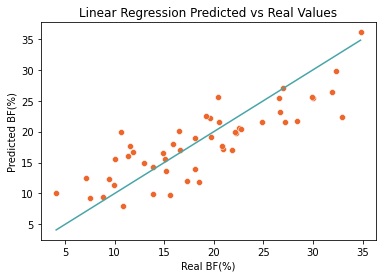

In [12]:
linear_model = LinearRegression() 
linear_model.fit(X_train, y_train)
linear_model_performance = model_performance(linear_model, 'Linear Regression')

models_performance_summary['Linear Regression'] = linear_model_performance

<h4>Linear ElasticNet</h4> 

Click <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet"> here</a> for more information.


MSE = 17.138427177316295 
Coefficient of determination = 0.6933693283986617


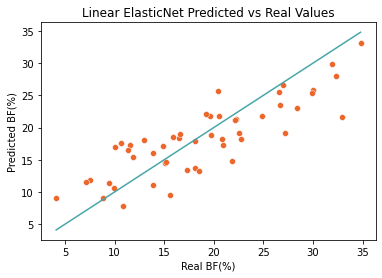

In [13]:
elastic_model = ElasticNet(random_state = 0) 
elastic_model.fit(X_train, y_train)
elastic_model_performance = model_performance(elastic_model, 'Linear ElasticNet')

Best Parameters: {'alpha': 0.25, 'l1_ratio': 0.9, 'random_state': 0} 

MSE = 16.94555977496015 
Coefficient of determination = 0.6968199986674449


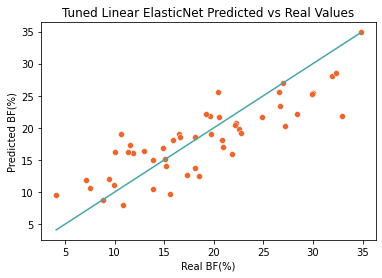

In [14]:
elastic_params = {'alpha': [0.25, 0.75, 1 , 2.5, 5],
                 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                 'random_state': [0]}

best_params = model_tunning_parameters(elastic_model, elastic_params)

elastic_new_model = ElasticNet(**best_params).fit(X_train, y_train)

elastic_model_performance = model_performance(elastic_new_model , 'Tuned Linear ElasticNet')

models_performance_summary['Linear ElasticNet'] = elastic_model_performance

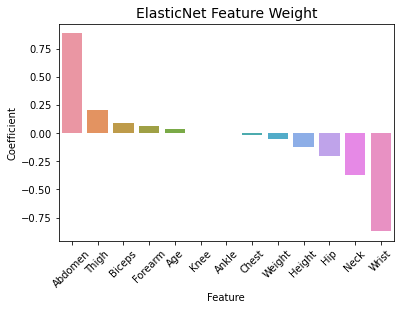

In [25]:
Elastic_weights = pd.DataFrame([ft_model_data_DF.columns, elastic_new_model.coef_], index = ['Feature', 'Coefficient'])

Elastic_weights = Elastic_weights.sort_values(by = 'Coefficient', 
                       axis = 1, 
                       ascending = False)

elastic_weights_plot = sns.barplot(Elastic_weights.loc['Feature',:], Elastic_weights.loc['Coefficient',:])
elastic_weights_plot.tick_params(axis='x', rotation=45)
elastic_weights_plot.set_title("ElasticNet Feature Weight", fontsize=14)

plt.show()

As expected, abdomen size has the highest positive contribution, followed by thigh size. On the contrary, wrist has similar weigh size to the abdomen, but its contribution is negative. Nevertheless, the wrist range is extremly short compared to the abdomen range (see box plots above), in fact, it is the shortest of all body meassurements, meaning that its contribution does not vary significantly among different people.

<h4>Extreme Gradient Boosting (XGB)</h4>
    
Click <a href="https://xgboost.readthedocs.io/en/stable/python/python_api.html"> here</a> for more information.    


MSE = 18.344971703810696 
Coefficient of determination = 0.6717825424790318


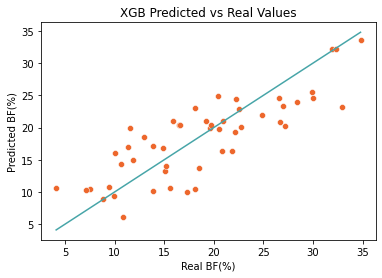

In [21]:
XGB_model = XGBRegressor().fit(X_train, y_train)
XGB_model_performance = model_performance(XGB_model, 'XGB')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'random_state': 0} 

MSE = 15.886952121324398 
Coefficient of determination = 0.7157599849589686


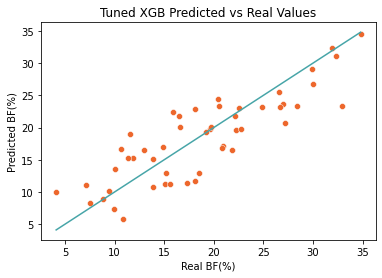

In [22]:
params = {'n_estimators' : [1000, 5000, 10000], 
          'learning_rate' : [0.5, 0.1, 0.05, 0.01],
          'max_depth' : [4, 6, 8, 10],
          "random_state": [0]}

best_params = model_tunning_parameters(XGB_model, params)

XGB_new_model = XGBRegressor(**best_params).fit(X_train, y_train)

XGB_model_performance = model_performance(XGB_new_model, 'Tuned XGB')

models_performance_summary['XGB'] = XGB_model_performance

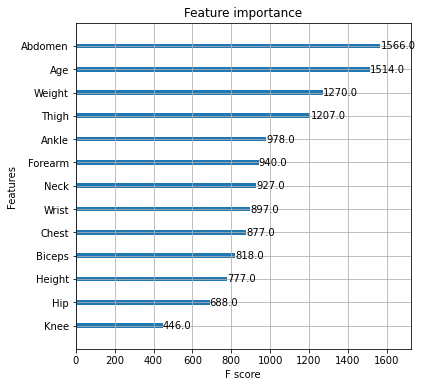

In [157]:
xgb.plot_importance(XGB_new_model)
plt.rcParams['figure.figsize'] = [6, 6]
plt.show()

Again, the top 2 body meassurements that contributes to the model are abdomen and thigh size. On the other hand, it is well known that fat distribution rises along with age independent of gender, but the impact is more noticeable on men <a href="https://www.dovepress.com/assessment-of-age-induced-changes-in-body-fat-percentage-and-bmi-aided-peer-reviewed-fulltext-article-CIA"> [2]</a>.

<h4>K-Nearest Neighbors (KNN)</h4>

Click <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html"> here</a> for more information. 


MSE = 22.52120799999999 
Coefficient of determination = 0.597063775872414


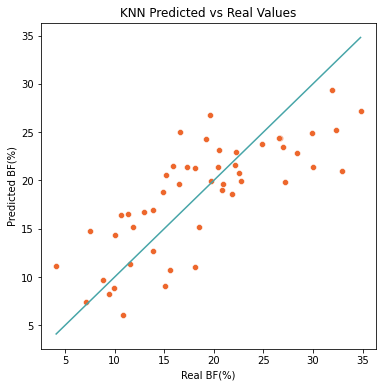

In [24]:
KNN_model = KNeighborsRegressor().fit(X_train, y_train)
KNN_model_performance = model_performance(KNN_model, 'KNN')

Best Parameters: {'n_neighbors': 8} 

MSE = 21.064965624999992 
Coefficient of determination = 0.6231180090199917


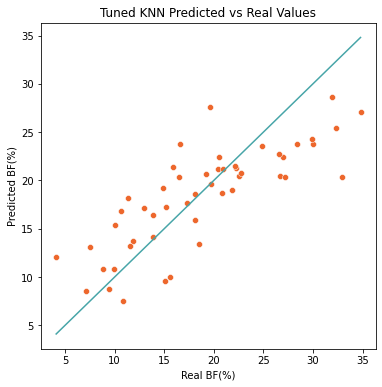

In [25]:
KNN_params = {"n_neighbors": np.arange(2,30,1)}

best_params = model_tunning_parameters(KNN_model, KNN_params)

KNN_Tuned = KNeighborsRegressor(**best_params).fit(X_train, y_train)

KNN_model_performance = model_performance(KNN_Tuned, 'Tuned KNN')

models_performance_summary['KNN'] = KNN_model_performance

<h4> Support Vector Regression (SVR) </h4>

Click <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html"> here</a> for more information. 


MSE = 36.06420109905377 
Coefficient of determination = 0.35476049876939697


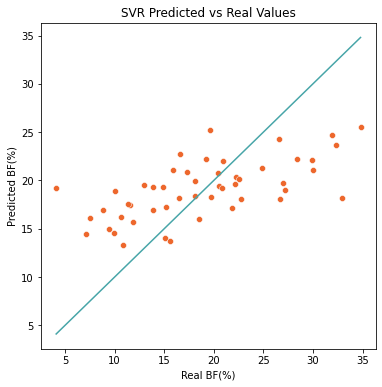

In [26]:
SVR_model = SVR().fit(X_train, y_train)
SVR_model_performance = model_performance(SVR_model, 'SVR')

Best Parameters: {'C': 100} 

MSE = 16.544563620418348 
Coefficient of determination = 0.7039943863113385


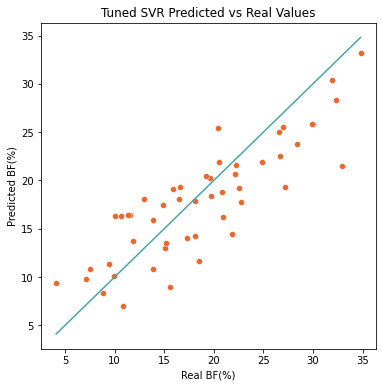

In [27]:
SVR_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1, 10, 100, 500,1000]}

best_params = model_tunning_parameters(SVR_model, SVR_params)

SVR_Tuned = SVR(**best_params).fit(X_train, y_train)

SVR_model_performance = model_performance(SVR_Tuned, 'Tuned SVR')

models_performance_summary['SVR'] = SVR_model_performance

<h4> Random Forest (RF)</h4>

Click <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html"> here</a> for more information. 


MSE = 18.129602619999993 
Coefficient of determination = 0.6756357996144617


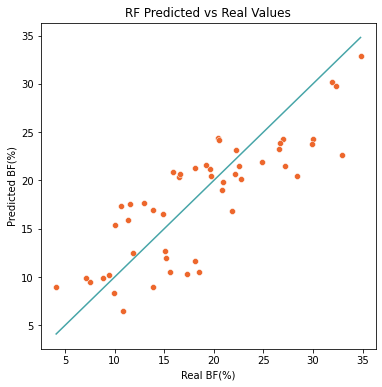

In [28]:
RF_model = RandomForestRegressor(random_state = 0).fit(X_train, y_train)
RF_model_performance = model_performance(RF_model, 'RF')

Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 500, 'random_state': 0} 

MSE = 18.584157541168118 
Coefficient of determination = 0.6675031699795817


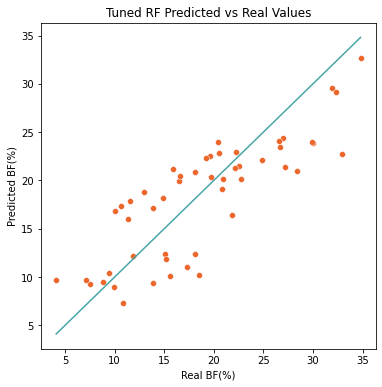

In [29]:
RF_params = {"max_depth": [None, 5,10],
             "max_features": [6, 10, "auto"],
             "n_estimators": [100, 500, 900],
             "min_samples_split": [2,10,30],
             "random_state": [0]}

best_params = model_tunning_parameters(RF_model, RF_params)

RF_Tuned = RandomForestRegressor(**best_params).fit(X_train, y_train)

RF_model_performance = model_performance(RF_Tuned, 'Tuned RF')

models_performance_summary['RF'] = RF_model_performance

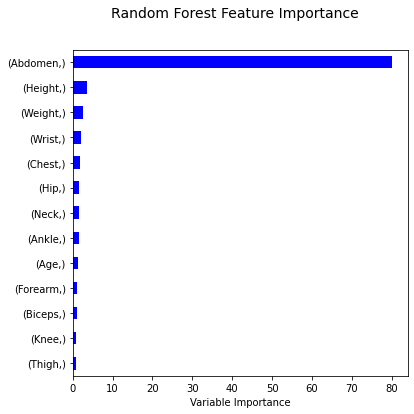

In [158]:
Importance = pd.DataFrame({'Importance':RF_Tuned.feature_importances_*100}, 
                          index = [ft_model_data_DF.columns])

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'b', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.suptitle('Random Forest Feature Importance', fontsize=14)
plt.show()

Surprisingly, for the RF model thigh size is the least important feature, even less important than knee size which was ranked the lowest relevant feature in the ElasticNet and XGB models. Despite being one of the worst models, Abdomen size is still by far the most predominant feature and could be the same reason of its performance, positioning at the bottom list.

<h4> Multi-layer Perceptron (MLP) Neural Network</h4>
    
Click <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html"> here</a> for more information. 


MSE = 64.77521786165201 
Coefficient of determination = -0.15892014772102048


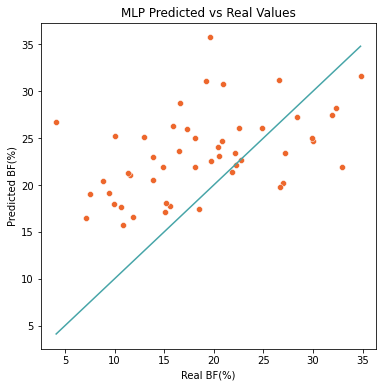

In [31]:
MLP_model = MLPRegressor(random_state = 0).fit(X_train, y_train)
MLP_model_performance = model_performance(MLP_model, 'MLP')

Best Parameters: {'hidden_layer_sizes': (150,), 'max_fun': 5000, 'max_iter': 1000, 'random_state': 0, 'solver': 'lbfgs'} 

MSE = 16.615229620053828 
Coefficient of determination = 0.7027300717564833


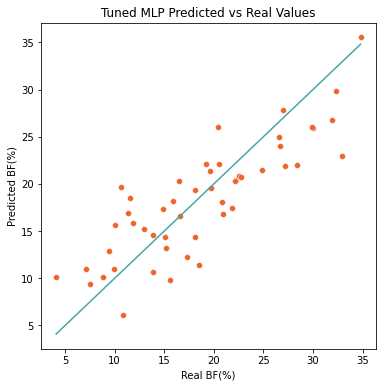

In [104]:
MLP_params = {"solver": ['lbfgs'],
             "max_iter": [1000,2500,5000],
             "hidden_layer_sizes": [(150,), (200,), (250,)],
             "random_state": [0],
             "max_fun" : [5000, 7500]}

best_params = model_tunning_parameters(MLP_model, MLP_params)

MLP_Tuned = MLPRegressor(**best_params).fit(X_train, y_train)

MLP_model_performance = model_performance(MLP_Tuned, 'Tuned MLP')

models_performance_summary['MLP'] = MLP_model_performance

In [98]:
summary = pd.DataFrame(models_performance_summary, index = ['MSE', r'$R^{2}$'])
summary

,Linear Regression,Linear ElasticNet,XGB,KNN,SVR,RF,MLP
MSE,17.240878,16.94556,15.886952,21.064966,16.544564,18.584158,16.61523
$R^{2}$,0.691536,0.69682,0.715760,0.623118,0.703994,0.667503,0.70273


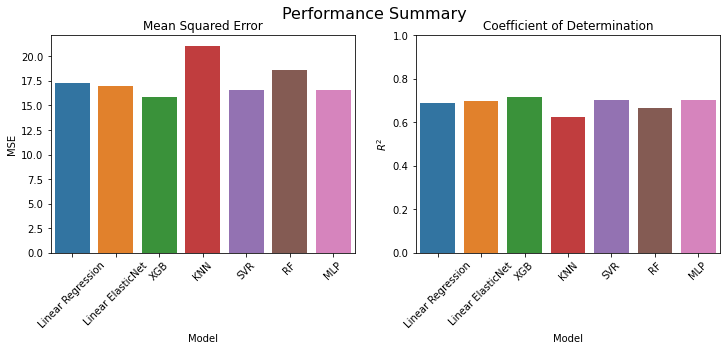

In [114]:
f, axs = plt.subplots(1,2, figsize = (12,4))

#Bar plot for MSE
sns.barplot(x = summary.columns, y = summary.iloc[0,:], ax = axs[0] )
axs[0].set(xlabel = 'Model',
           title = 'Mean Squared Error')
axs[0].tick_params(axis='x', rotation=45)

#Bar plot for R^2
sns.barplot(x = summary.columns, y = summary.iloc[1,:], ax = axs[1])
axs[1].set(xlabel = 'Model',           
           ylim = (0,1),
           title = 'Coefficient of Determination')
axs[1].tick_params(axis='x', rotation=45)


f.suptitle('Performance Summary', fontsize=16)


plt.show()

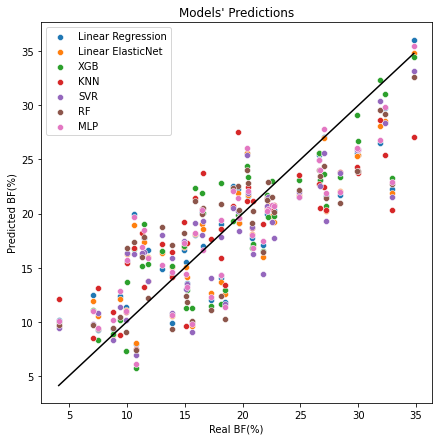

In [147]:
keys = predictions.keys()

#Joining predictions of tuned models in a list
xs = [y_valid for i in range(len(ys))]
ys = [predictions[key] for key in keys if ("Tuned" in key or "Regression" in key)]

#Ploting predictions of all models
for x,y,model in zip(xs,ys, summary.columns):
    scatter = sns.scatterplot(x = x, y = y, label = model)
sns.lineplot(x= y_valid, y = y_valid, color = 'black')    

scatter.set(title = "Models' Predictions",
          ylabel = 'Predicted BF(%)',
          xlabel = 'Real BF(%)')

plt.show()

<h3>Final Thoughs</h3>

<p>
    Meassure of Body Fat Percentage has always been a challenge and its roll in health is being recognized in recent years and compared with other health indicators such as Body Mass Index (BMI).
</p>
<p>
    The best regression model for the dataset turns out to be Extreme Gradient Boosting (XGB) which is no surprise because it is one of the state of the art ML methods. 
    All models overestimate BF% in the lower ranges and underestimate in the higher ranges, while values around the median where mixed but most accuarates in general. If enough data is available, one could make an eseemble of diferents models to improve predictions or create models for different subgroups (age grouping for example) or restric the model for people in the InterQuantile Range, deleting the issues of very low and high BF% values, which will be more accuarate for the average person. Furthermore, there are too many useless features, it will be convinient to reduce them and focus on key features like weight, age, abdomen, thigh, wrist and neck size. Although the error of the XGB model is about 4%, it is still a decent prediction and the cost to use the model is basically free, but human error could arise when taking body measurements.

# This is a change that I will regret doing